## Lab 2A: Ideal Gas Law, Constant Pressure (Trial 2)
<bk>

Shreya Parjan
<bk>
9/17/18

The objective of this lab is to explore the relationship between temperature and volume at constant pressure using the Ideal Gas Law. By collecting data on the expansion of a gas's volume as it is heated, we can quantify the direct relationship between temperature and volume of a gas at constant pressure. We know that the gas will expand when heated at constant pressure because the gas molecules will receive thermal energy and need to occupy a larger volume to maintain pressure.

### Relevant imports for analysis: numpy, matplotlib.pyplot and %matplotlib inline.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import scipy.optimize
import math as m
%matplotlib inline

### Raw data.

In [6]:
tempRoom = 21.0 #degrees celsius

rTube = 0.15875 #cm (converted from actual value rTube = 1/16 in)
hTube = 32 #height, since we're treating the tube like a cylinder (cm)

flaskVol = 29 #cm^3
tempFlask = np.array([22,27,31,34,39,41,53,60,66,75]) #degrees celsius

volSyringe = np.array([0.1,0.5,1.5,2,2.5,3,3.5,4,4.5,5]) #cm^3

### Analysis Code.  This block is for the FIRST ROUND of data with constant pressure.

In [11]:
tubeVol = np.pi*rTube**2*hTube
volTube = np.ones(10)*tubeVol

volFlask = np.ones(10)*flaskVol #converts integer flaskVol to an array

volTotal = volFlask + volSyringe + volTube

#calculates weighted syringe temp
tempWeightedSyringe = np.ones(10)
for i in range(len(volSyringe)):
    tempWeightedSyringe[i] = tempRoom/volSyringe[i]

#examines tube in 2 different parts: that at syringe temp and that at flask temp
percentTubeAtSyringeTemp = 1
percentTubeAtFlaskTemp = 0

#creates arrays for unweighted temperatures of the 3 components of the setup
tempSyringeTube = np.ones(10)
tempFlaskTube = np.ones(10)
tempTube = np.ones(10)

#creates arrays to calculate the weighted temperature of the 3 components of the setup
totalTempTube = np.ones(10)
totalTempFlask = (1/volTotal)*(tempFlask*volFlask)
totalTempSyringe = (1/volTotal)*(tempRoom*volSyringe)

for j in range(len(tempSyringeTube)):
    tempSyringeTube[j] = tempRoom
    tempFlaskTube[j] = tempFlask[j]
    tempTube[j] = (percentTubeAtSyringeTemp*tempSyringeTube[j])+(percentTubeAtFlaskTemp*tempFlaskTube[j])
    totalTempTube[j] = (1/volTotal[j])*(tempTube[j]*volTube[j])

#calculates total weighted temperature of setup
totalTemp = totalTempFlask + totalTempSyringe + totalTempTube

#for testing purposes, prints various calculated values
#print('temp tube = ',tempTube)
#print('vol total = ', volTotal)
#print('total temp = ', totalTemp)

### This cell produces a graph of Total Volume vs. Weighted Temperature for Trial 1.

y-intercept =  -243.26215380627167
slope =  8.301345220678293
uncertainties:  [22.99937896  0.67191983]


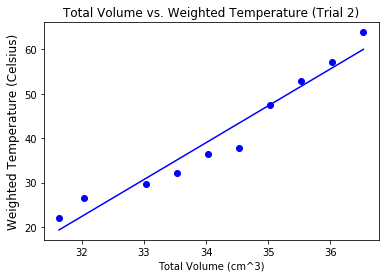

In [12]:
def straight_line_model(x, A, B):
    return A + B * x

popt, pcov = scipy.optimize.curve_fit(straight_line_model, volTotal, totalTemp)
yIntercept = popt[0]
slope = popt[1]
print('y-intercept = ',yIntercept)
print('slope = ',slope)

volTotal_for_plot = np.linspace(volTotal.min(), volTotal.max(), 50)
best_fit_line = straight_line_model(volTotal_for_plot, popt[0], popt[1])

#calculates uncertainties for both variables
popt_uncertainties = np.sqrt(np.diag(pcov)) # get the diagonal elements then take sqrt
print('uncertainties: ', popt_uncertainties)

plt.plot(volTotal, totalTemp, 'bo') #without '-' after bo, plots points alone
plt.plot(volTotal_for_plot, best_fit_line, 'b') # adds best fit line

plt.xlabel('Total Volume (cm^3)') # label the x-axis
plt.ylabel('Weighted Temperature (Celsius)', size=12) # label the y-axis

plt.title('Total Volume vs. Weighted Temperature (Trial 2)') # title
plt.show()

### Answers to questions and conclusions from Trial 2.
1. Temperature when volume approaches 0 (and uncertainty)
    When the volume approaches 0, the line will approach its y-intercept. Using the popt array, the y-intercept of the equation is -250 degrees Celsius +/- 20.
    
    
2. Initial assumption for temperature in tubing
    
    We calculuate a weighted temperature when examining the temperature of the gas inside the connecting tube because it varies relative to whether it is closer to the flask (a volume at greater than room temperature) or the syringe (a volume at roughly room temperature).
    
    Total volume is the sum of the volume in the flask + the volume in the syringe + the volume in the tube. We can approximate the volume of the tube by treating it as a cylinder with r = 0.0025 m and h = 0.32 m.
    
    We'll calculate the weighted temperature of the tube in 2 cases. Case 1 is where approx. 1/3 of the tube volume's temperature varies relative to the flask and approx. 2/3 varies relative to the syringe.
    
    
3. Second assumption for temperature in tubing emperature 
    
    Case 2 is where approx. 2/3 of the tube volume's temperature varies relative to the flask and approx. 1/3 varies relative to the syringe (approx room temp).
    
    3a. Recalculated value for absolute zero
    
      After switching the values for how much of the tube's temperature varies relative to the flask and syringe, I obtained -260 degrees Celsius +/- 20 for absolute zero.
      
4. Third assumption for temperature in tubing 

    Case 3 is where 100% of the tube's temperature is that of the syringe, or room temperature.
    
    4a. Recalculated value for absolute zero.
    
      After setting the value for percentTubeAtSyringeTemp to 1 (corresponding to 100% at room temp) I obtained -240 degrees celsius +/- 20 for absolute zero.
           
Conclusion:
Although we took fewer data points in trial 2 than in trial 1, the relationship between volume and temperature is still consistent. The positive slope of the line of best fit suggests that there is a direct relationship between volume and temperature when pressure is held constant. More data points would help reduce the uncertainty in the measurements which is double that of trial 1. We have established that absolute zero is at the y-intercept of the line as we approach a total volume of 0 cm^3 but it varies depending on whether more of the tube's temperature mirrors that of the flask or the syringe.

Rename the Notebook and download it as a Notebook (.ipynb).
<bk>
Send to your Dropbox.